# <center>Network Science</center>

## <center>#2: Network models</center>

### <center>Student: *ATAKHUJAEV SOBITKHON*</center>

#### <hr /> General Information

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

[9 8 3 0 6 2 5 7 1 4]
[4 7 8 2 0 1 9 5 3 6]


C:\Users\Sobitkhon\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


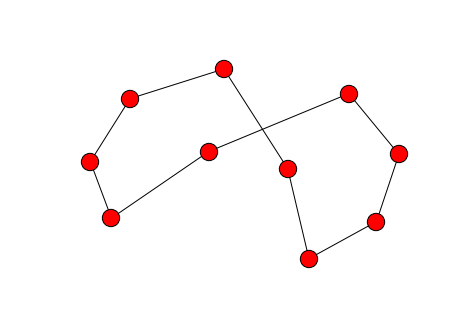

In [3]:
#Model_A_B()
n=1000
#while(n<3000):
n0=10
m0=10
G = nx.Graph()
G.add_nodes_from(range(0,n0))
arr1 = np.random.choice(n0, m0, replace=False)
arr2 = np.random.choice(n0, m0, replace=False)
G.add_edges_from(zip(arr1,arr2)) 
print arr1
print arr2
#while(n<1500):

nx.draw(G)

In [4]:
p = np.array(G.degree().values())*1.0/np.array(G.degree().values()).sum()
print p

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


[4 0 9 5 2 7 6 8 3 1]
[ 7  9  3  5 10  0  2  8  6  1]
[11  6  8  1  3  5  4  0 10  9]
[10 11  4  9  7  1  0  8  5  6]
[ 2  8 12  5  7 11  6 13 10  0]
[ 2  1 10 13  3  8  0 14  6  7]
[13  0 10  8  1  7  2  3  9  4]
[ 3  8 11 10 16  1  4 15  2  7]
[10 14  3  4  0  5  7 11 15 13]
[ 3 16 15  0  8 10 12  2 13 14]
[ 8 14 10 15 16  9 13  7 11  4]
[ 3 10  9 16 18 17 20 12  2  0]
[16 19 18  6 20 14  9  5 15 11]
[14 20 12  0  4 11 21  3  8  6]
[23 19  4 11  2 13 15 14 10  9]
[14  9 12 11  3 24 15  2 22  4]
[ 2 15  8 10 23 14 22  5  9  1]
[14 10 13 17  8  0 19  7  5 26]
[ 6 10  5 16 11  0 12  8  7 14]
[ 8 13 19 15 16 26  3  2 22 23]
[16 25 11  3 12 17 13 20 26  9]
[11 21 10 16  2 12  8 18 13 14]
[ 6  1  2 14  5  9 16 11 13 20]
[29  4 15 13 18  8 19  1  7 21]
[ 2 33  9 24 12 11 14  5 18 10]
[ 6  2 21 19  0 11 22 15 14 10]
[ 3 23  2  5 18 12 20 26 19 29]
[27 22 34 31 11 29  9 21 15  5]
[22 14  6 26 15 11 35 13 33 21]
[10  9  2  0 17 37 14  4  5 16]
[23  0  7 25 26 10 14  1 31 28]
[ 2 39  9 34 38 17

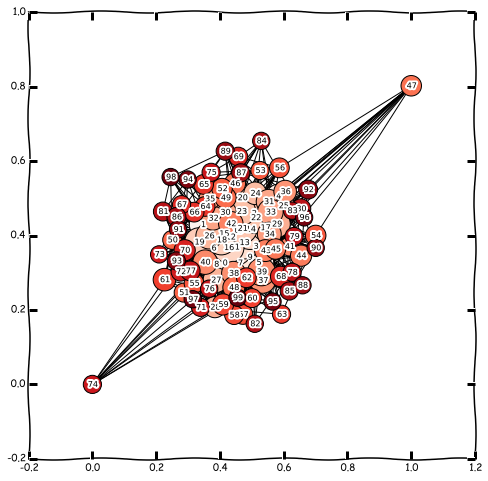

In [5]:
for i in range(n0, 100):
    p = np.array(G.degree().values())*1.0/np.array(G.degree().values()).sum()
    arr1 = np.random.choice(G.number_of_nodes(), m0, replace=False,p=p)
    print arr1
    G.add_node(i)
    G.add_edges_from([(i,j) for j in arr1]) 
    n0=n0+1
    #n=n+500
k = nx.degree(G)
plt.figure(1, figsize=(8,8))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*30 for d in k.values()],
                 node_color=k.keys(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings